# Import Modules

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = 'Helvetica'

# Read Data

The data used in this study is the calculated DAV value, because including all netcdf data to be stored in the data availability might not be good option.

In [2]:
data_tc_WP = pd.read_excel('./data/DAV_Smoothed_Western Pacific.xlsx')

# Plot Data

The aim of the plot is to see the relationships between DAV value and TC intensity. Besides, to quantitatively assess the relationships, Pearson Correlation Coefficient and Spearman Rank Correlation Coefficient is included in the plot.

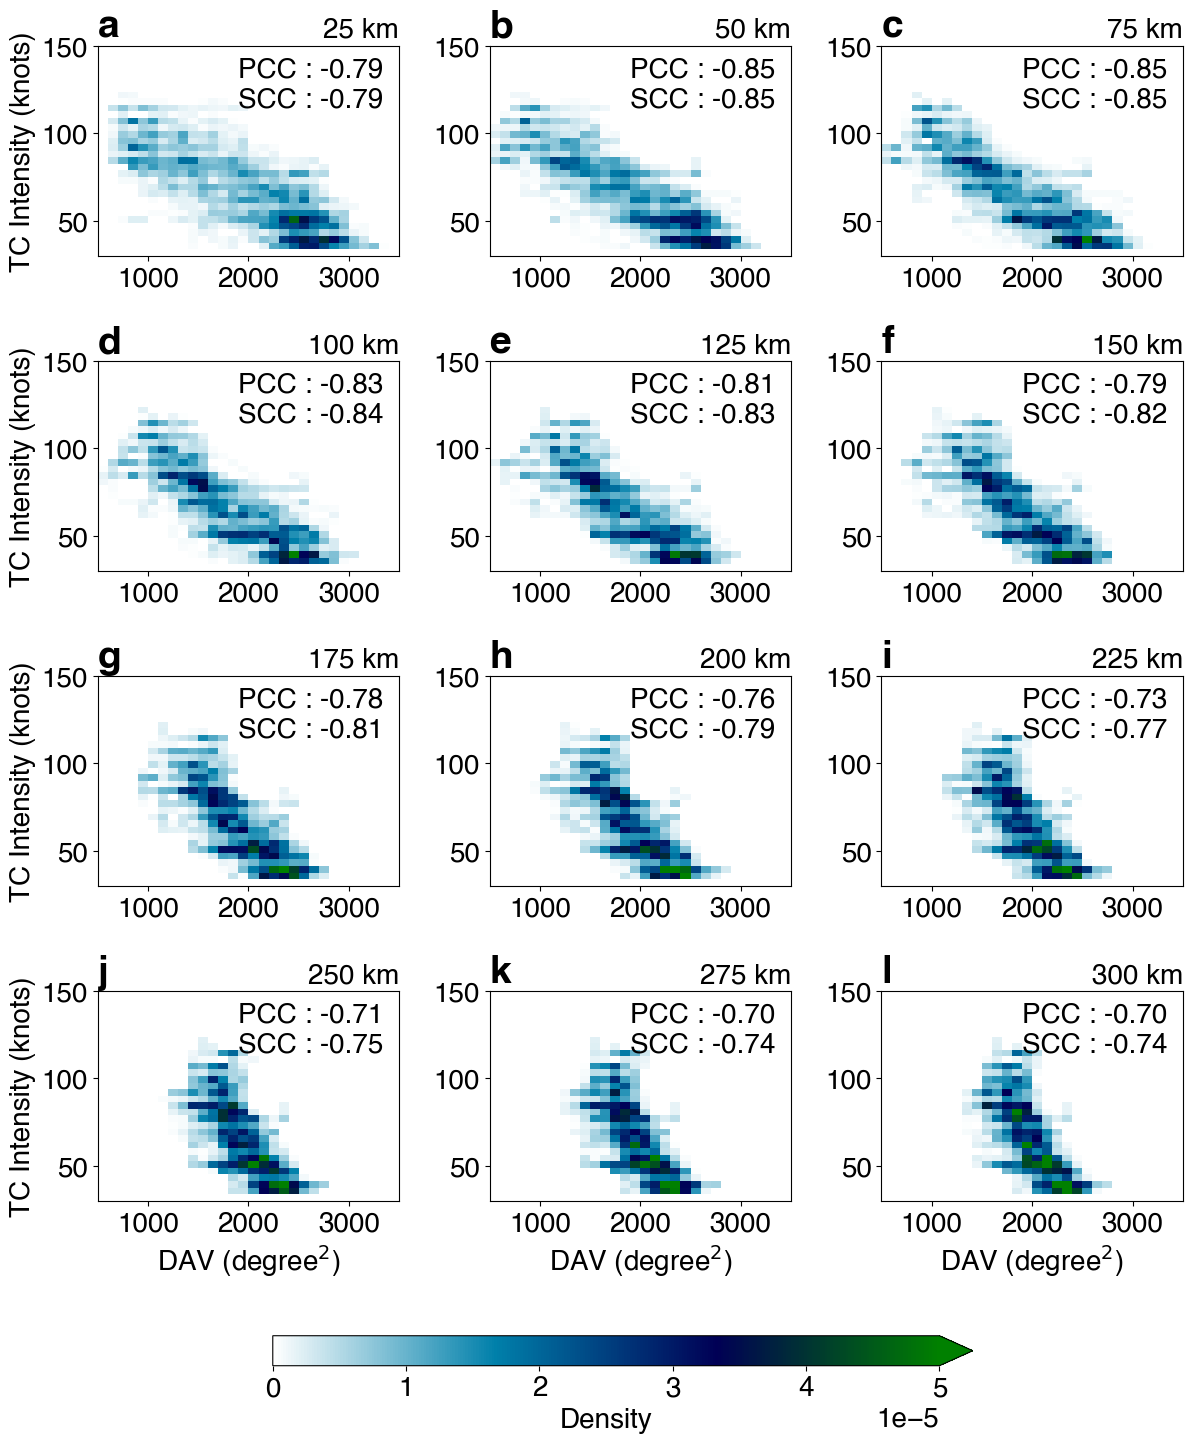

In [3]:
draft = True #True for drafting, and False for printing

xmin, xmax = 500, 3500
ymin, ymax = 30, 150
cmin, cmax = 0, 5e-5

col_pic = 3
row_pic = 4

fs = 20
fs_i = 28

plt.rcParams.update({'font.size': fs})
                    
fig, ax = plt.subplots(row_pic, col_pic, figsize=(14, 15))

char = 'abcdefghijkl'

for i in range(row_pic):
    for j in range(col_pic):
        axs = ax[i,j].hist2d(data_tc_WP["DAV"+str(25*(col_pic*i+j+1))], data_tc_WP["TC Intensity"],
                      bins=[30,32], range=[[xmin, xmax],[ymin,ymax]], cmap='ocean_r', density=True, vmin=cmin, vmax=cmax)
        ax[i,j].set_title("%d km"%(25*(col_pic*i+j+1)), loc='right', fontsize=fs)
        if j==0:
            ax[i,j].set_ylabel("TC Intensity (knots)")
        if i==row_pic-1:
            ax[i,j].set_xlabel("DAV (degree$^2$)")
        
        pcc = data_tc_WP["DAV"+str(25*(col_pic*i+j+1))].corr(data_tc_WP["TC Intensity"], method='pearson')
        scc = data_tc_WP["DAV"+str(25*(col_pic*i+j+1))].corr(data_tc_WP["TC Intensity"], method='spearman')
        ax[i,j].text(1900, 115, "PCC : %.2f\nSCC : %.2f"%(pcc, scc), fontsize=fs)
        ax[i,j].set_title(char[col_pic*i+j], fontweight='bold', fontsize=fs_i, loc='left')
        axs[3].set_clim(cmin,cmax)

plt.subplots_adjust(hspace=0.5,wspace=0.3)
cbar_ax = fig.add_axes([0.25, 0, 0.5, 0.02]) 
cbar = fig.colorbar(axs[3], cax=cbar_ax, orientation='horizontal', extend='max')
cbar.set_label("Density")

if draft==False:
    plt.savefig("histogram_radius.png", dpi=200, bbox_inches='tight')